In [60]:
import pandas as pd

dfC = pd.read_csv('sales_data_raw.csv')
dfC

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount
0,T001,C001,2023-01-01,Widget,2,10,0.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10
2,T003,C003,2023-01-07,Widget,3,10,0.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05
4,T005,C001,2023-01-12,Widget,1,10,0.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20
6,T007,C005,2023-01-18,Widget,4,10,0.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10
8,T009,C003,2023-01-22,Widget,5,10,0.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15


In [6]:
import pandas as pd

dfJ = pd.read_json('customers_data.json')
dfJ

,CustomerID,Name,JoinDate
0,C001,Alice,2022-12-01
1,C002,Bob,2022-11-15
2,C003,Charlie,2023-01-05
3,C004,Diana,2023-01-10
4,C005,Evan,2023-01-20


### 4. How would you transform the TransactionDate in the sales data and the JoinDate in the customer data into proper datetime objects using Pandas?


In [35]:
dfC['TransactionDate'] = dfC.TransactionDate.apply(pd.to_datetime)         #convert the Transaction date in sales data
dfC.dtypes

TransactionID              object
CustomerID                 object
TransactionDate    datetime64[ns]
Product                    object
Quantity                    int64
Price                       int64
Discount                  float64
dtype: object

In [34]:
dfJ['JoinDate'] = dfJ.JoinDate.apply(pd.to_datetime)         #convert the Transaction date in sales data
dfJ.dtypes

CustomerID            object
Name                  object
JoinDate      datetime64[ns]
dtype: object

### Final Transaction Amount = (Quantity × Price) × (1 – Discount) 
Write a function to calculate the final transaction amount given the columns Quantity, Price, and Discount.

In [33]:
def calcTransaction(quantity, price, discount):
    return (quantity * price) * (1 - discount)          #return the value of the formula given

In [83]:
dataset = dfC.merge(dfJ, how = 'outer')
dataset

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Name,JoinDate
0,T001,C001,2023-01-01,Widget,2,10,0.00,Alice,2022-12-01
1,T005,C001,2023-01-12,Widget,1,10,0.00,Alice,2022-12-01
2,T002,C002,2023-01-05,Gadget,1,20,0.10,Bob,2022-11-15
3,T004,C002,2023-01-10,Gizmo,5,15,0.05,Bob,2022-11-15
4,T008,C002,2023-01-20,Gizmo,3,15,0.10,Bob,2022-11-15
5,T003,C003,2023-01-07,Widget,3,10,0.00,Charlie,2023-01-05
6,T009,C003,2023-01-22,Widget,5,10,0.00,Charlie,2023-01-05
7,T006,C004,2023-01-15,Gadget,2,20,0.20,Diana,2023-01-10
8,T007,C005,2023-01-18,Widget,4,10,0.00,Evan,2023-01-20
9,T010,C005,2023-01-25,Gadget,3,20,0.15,Evan,2023-01-20


### What method in Pandas would you use to identify and remove duplicate rows in the sales data?

In [98]:
dfC.drop_duplicates()

,TransactionID,CustomerID,TransactionDate,Product,Quantity,Price,Discount
0,T001,C001,2023-01-01,Widget,2,10,0.00
1,T002,C002,2023-01-05,Gadget,1,20,0.10
2,T003,C003,2023-01-07,Widget,3,10,0.00
3,T004,C002,2023-01-10,Gizmo,5,15,0.05
4,T005,C001,2023-01-12,Widget,1,10,0.00
5,T006,C004,2023-01-15,Gadget,2,20,0.20
6,T007,C005,2023-01-18,Widget,4,10,0.00
7,T008,C002,2023-01-20,Gizmo,3,15,0.10
8,T009,C003,2023-01-22,Widget,5,10,0.00
9,T010,C005,2023-01-25,Gadget,3,20,0.15


### Are there other transformations that are necessary to perform on the dataset that were not included so far? List down and perform.

In [84]:
# set the index to transactionID to have a better way to select the dataset
dataset.set_index('TransactionID', inplace = True)
dataset

,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Name,JoinDate
TransactionID,,,,,,,,
T001,C001,2023-01-01,Widget,2,10,0.00,Alice,2022-12-01
T005,C001,2023-01-12,Widget,1,10,0.00,Alice,2022-12-01
T002,C002,2023-01-05,Gadget,1,20,0.10,Bob,2022-11-15
T004,C002,2023-01-10,Gizmo,5,15,0.05,Bob,2022-11-15
T008,C002,2023-01-20,Gizmo,3,15,0.10,Bob,2022-11-15
T003,C003,2023-01-07,Widget,3,10,0.00,Charlie,2023-01-05
T009,C003,2023-01-22,Widget,5,10,0.00,Charlie,2023-01-05
T006,C004,2023-01-15,Gadget,2,20,0.20,Diana,2023-01-10
T007,C005,2023-01-18,Widget,4,10,0.00,Evan,2023-01-20


In [85]:
# sort the dataset by the TransactionDate to have a chronological order of data

dataset.sort_values('TransactionDate', inplace = True)
dataset

,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Name,JoinDate
TransactionID,,,,,,,,
T001,C001,2023-01-01,Widget,2,10,0.00,Alice,2022-12-01
T002,C002,2023-01-05,Gadget,1,20,0.10,Bob,2022-11-15
T003,C003,2023-01-07,Widget,3,10,0.00,Charlie,2023-01-05
T004,C002,2023-01-10,Gizmo,5,15,0.05,Bob,2022-11-15
T005,C001,2023-01-12,Widget,1,10,0.00,Alice,2022-12-01
T006,C004,2023-01-15,Gadget,2,20,0.20,Diana,2023-01-10
T007,C005,2023-01-18,Widget,4,10,0.00,Evan,2023-01-20
T008,C002,2023-01-20,Gizmo,3,15,0.10,Bob,2022-11-15
T009,C003,2023-01-22,Widget,5,10,0.00,Charlie,2023-01-05


In [86]:
# create a new column of the total transaction to get a better insight on the sales
listData = []
j,k,l = 0,0,0
for i in range(len(dataset)):                                  
    
    answer = float(calcTransaction(dataset.Quantity.iloc[k], dataset.Price.iloc[j], dataset.Discount.iloc[l]))  #use the calcTransaction function earlier
    j += 1                                                                                  
    k += 1
    l += 1
    listData.append(float(answer))

In [87]:
dataset['Total Amount'] = listData              #put the listData into a new column
dataset

,CustomerID,TransactionDate,Product,Quantity,Price,Discount,Name,JoinDate,Total Amount
TransactionID,,,,,,,,,
T001,C001,2023-01-01,Widget,2,10,0.00,Alice,2022-12-01,20.00
T002,C002,2023-01-05,Gadget,1,20,0.10,Bob,2022-11-15,18.00
T003,C003,2023-01-07,Widget,3,10,0.00,Charlie,2023-01-05,30.00
T004,C002,2023-01-10,Gizmo,5,15,0.05,Bob,2022-11-15,71.25
T005,C001,2023-01-12,Widget,1,10,0.00,Alice,2022-12-01,10.00
T006,C004,2023-01-15,Gadget,2,20,0.20,Diana,2023-01-10,32.00
T007,C005,2023-01-18,Widget,4,10,0.00,Evan,2023-01-20,40.00
T008,C002,2023-01-20,Gizmo,3,15,0.10,Bob,2022-11-15,40.50
T009,C003,2023-01-22,Widget,5,10,0.00,Charlie,2023-01-05,50.00


### What are the visualizations necessary to extract insight from the dataset? Provide a list of these steps, perform and derive the necessary insights.



1. Determine what we can get from the data to decide what plot to use
2. Extract the necessary columns for the data
3. Perform the plotting
4. Analyze the plot

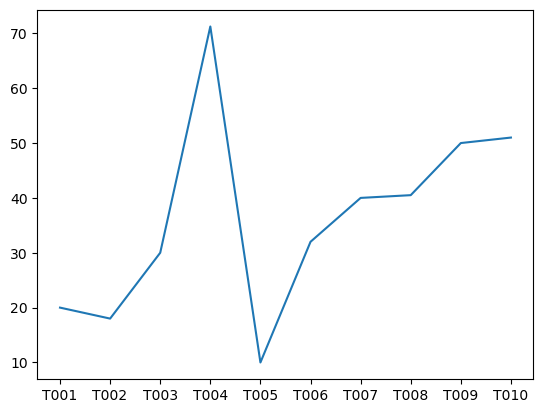

In [91]:
import matplotlib.pyplot as plt

# extracting the data for line plot to see what is the sales per transaction

x = dataset.index            # get the index for the x axis of line plot
y = dataset['Total Amount']  # get the total amount column for the y axis 

plt.plot(x, y)

From the plot we can conclude that the highest sales happened at the 4th transaction while the lowest sales is at the 5th transaction.

In [97]:
#extract the grouped data of names and their spendings
grouped = dataset.groupby('Name')['Total Amount'].sum()

([<matplotlib.patches.Wedge at 0x1389980af00>,
 [Text(1.0630813596684339, 0.2825916182860247, 'Alice'),
  Text(-0.07971479196009292, 1.0971078123606446, 'Bob'),
  Text(-1.0447550102304415, -0.34421936116144075, 'Charlie'),
  Text(-0.30668446102872854, -1.056382810047342, 'Diana'),
  Text(0.7757094380384381, -0.7799197828867344, 'Evan')])

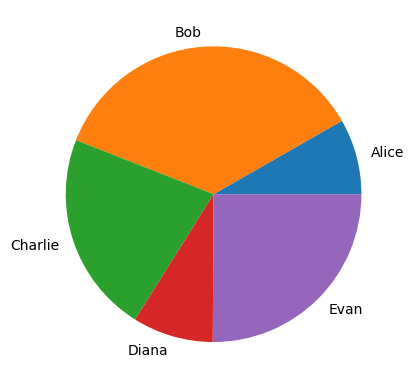

In [96]:
plt.pie(grouped, labels = dataset['Name'].drop_duplicates()) # plot it in pie graph

As we can see from the data Bob has the highest spendings while Diana and Alice have the least spendings.